# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [36]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
rng.seed(seed=0)

In [82]:
# Parameters
learning_rate = 0.01
training_epochs = 10000
display_step = 500

In [89]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [90]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [91]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [96]:
regularization = 0.3
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
reg_cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples) + regularization *tf.reduce_sum(tf.pow(pred, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(reg_cost)

In [97]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Initialized at: W= 0.864436 b= -0.742165 

Epoch: 0500 cost= 0.286804110 regularized cost= 0.796159863 W= 0.280373 b= -0.0245841
Epoch: 1000 cost= 0.255504280 regularized cost= 0.769753456 W= 0.231479 b= 0.328598
Epoch: 1500 cost= 0.246472836 regularized cost= 0.764434099 W= 0.209497 b= 0.487384
Epoch: 2000 cost= 0.243431062 regularized cost= 0.763367176 W= 0.199614 b= 0.558775
Epoch: 2500 cost= 0.242269605 regularized cost= 0.763155222 W= 0.195171 b= 0.590869
Epoch: 3000 cost= 0.241788998 regularized cost= 0.763113976 W= 0.193173 b= 0.605303
Epoch: 3500 cost= 0.241581351 regularized cost= 0.763106465 W= 0.192274 b= 0.611791
Epoch: 4000 cost= 0.241490021 regularized cost= 0.763105214 W= 0.191871 b= 0.614702
Epoch: 4500 cost= 0.241449296 regularized cost= 0.763105154 W= 0.19169 b= 0.616011
Epoch: 5000 cost= 0.241430730 regularized cost= 0.763105273 W= 0.191608 b= 0.616604
Epoch: 5500 cost= 0.241422817 regularized cost= 0.763105273 W= 0.191572 b= 0.616862
Epoch: 6000 cost= 0.241418332 re

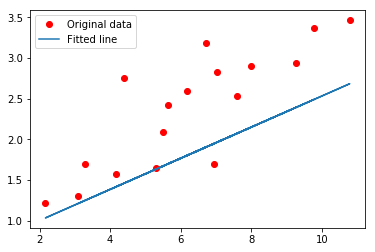

In [98]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    print("Initialized at: W=", sess.run(W), "b=", sess.run(b), '\n')
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            reg_c = sess.run(reg_cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "regularized cost=", "{:.9f}".format(reg_c), "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

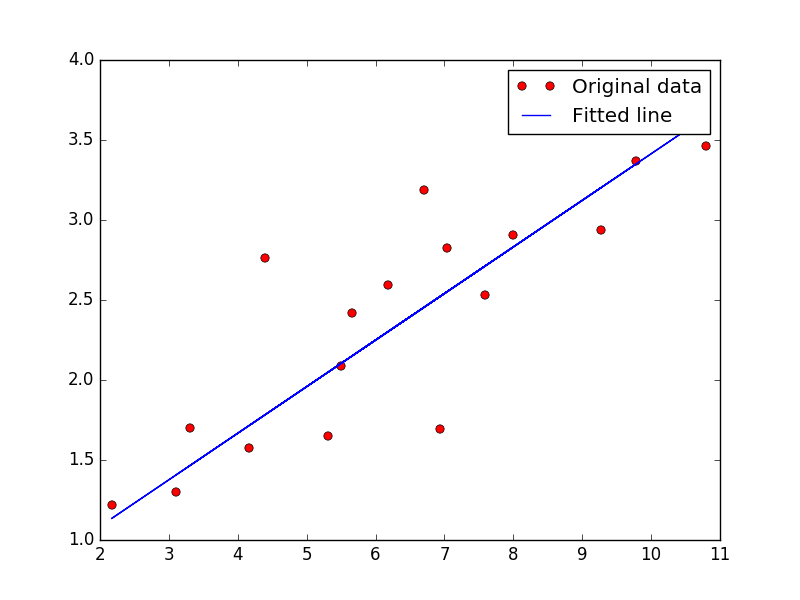

In [1]:
# Regression result
#Training cost= 0.0769907 W= 0.249607 b= 0.801368